In [1]:
import pandas as pd
import torch
import torch.nn as nn
import tqdm
import torch.nn.functional as F
import os
import numpy as np
import random
import re
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import eagleSqlTools
from torch.utils.tensorboard import SummaryWriter
import torchvision
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))

from useful_functions_notebook_1to5 import *

In [3]:
dataset_one_one = torch.load('data/dataset_distlognorm_massnorm.pt')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
dataset_one_one.min()

tensor(0., dtype=torch.float64)

In [5]:
def count_equality(images, reconstructed_images, lower_bound = 0.19, upper_bound = 0.77):
    
    images_stack = torch.cat(images, dim = 0)
    recon_images_stack = torch.cat(reconstructed_images, dim = 0)

    equal = 0
    sim = 0
    num = images_stack.shape[0]

    for i in range(num):
        img1 = images_stack[i, 2].unsqueeze(0)
        img2 = recon_images_stack[i, 2].unsqueeze(0)
        
        mapped = map_values(img2,lower_bound, upper_bound)

        if torch.equal(img1, mapped):
            equal += 1

        sim += similarity_percentage(img1, mapped)


    sim = sim / num
    
    print(f"Number of 100% equal subh images = {equal} / {num} = {(equal / num * 100):.2f}% of recon subh are equal original subh")
    print(f"Average similarity = {sim:.2f}%")

    return equal, round(sim, 4)

In [6]:
nsnap = dataset_one_one.shape[2]
nbr = dataset_one_one.shape[3]
nvar = dataset_one_one.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(dataset_one_one, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

def reconstruction_loss_CGAN(real_image, fake_image, mse = True):
    num_chan = real_image.shape[1]
    reconstruction_loss = 0.0
    for chan in range(num_chan):
        real_value = real_image[:, chan, :, :]
        fake_value = fake_image[:, chan, :, :]
        if mse:
            reconstruction_loss += ((real_value - fake_value)**2).sum()
        else:
            criterion = nn.CrossEntropyLoss()
            reconstruction_loss += criterion(real_value, fake_value)

    return reconstruction_loss

0/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.14it/s]


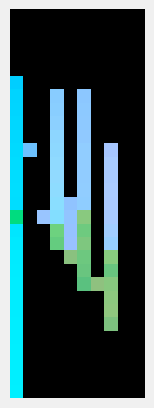

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


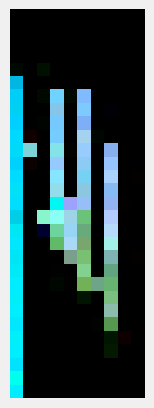

1/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.15it/s]


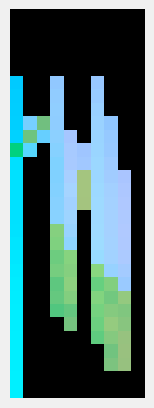

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


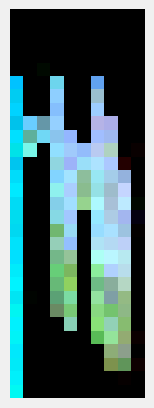

2/50


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.13it/s]


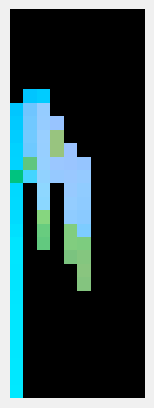

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


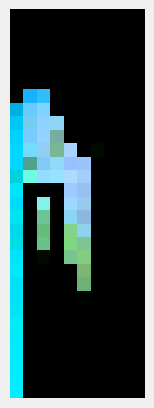

3/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.12it/s]


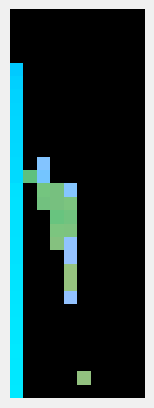

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


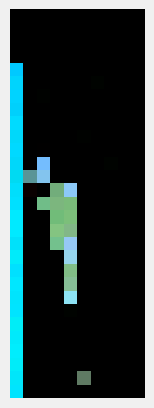

4/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.34it/s]


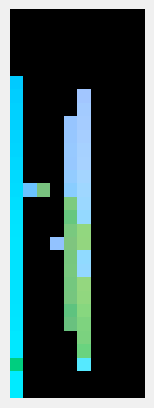

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


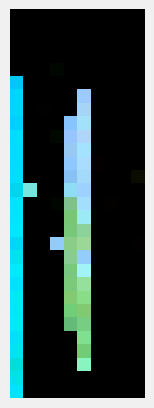

5/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.07it/s]


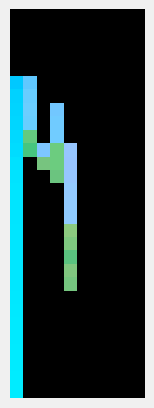

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


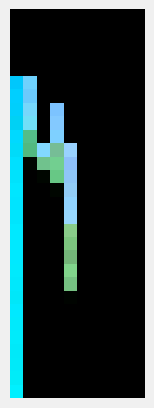

6/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.20it/s]


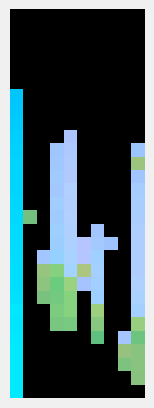

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


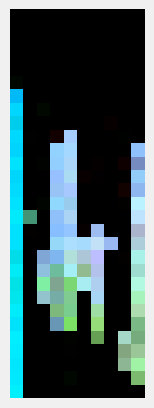

7/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.38it/s]


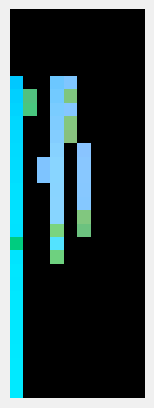

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


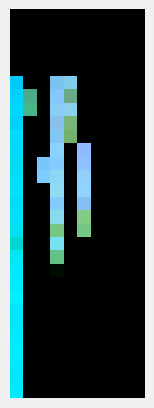

8/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.38it/s]


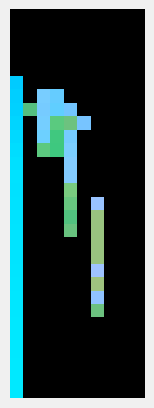

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


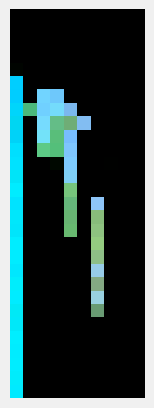

9/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.03it/s]


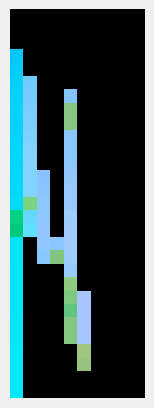

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


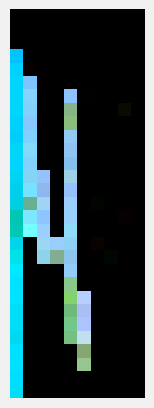

10/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.16it/s]


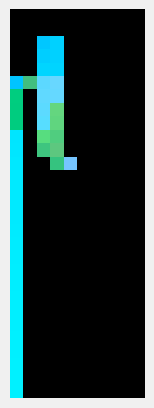

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


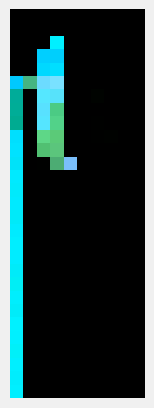

11/50


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.15it/s]


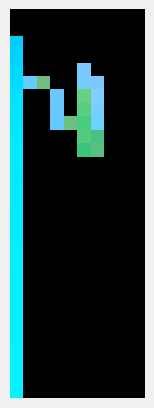

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


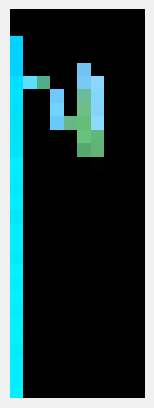

12/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.12it/s]


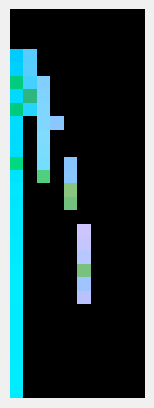

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


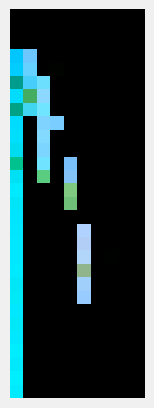

13/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.22it/s]


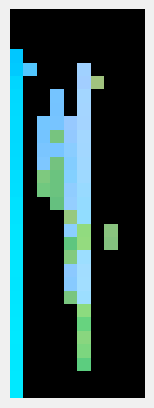

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


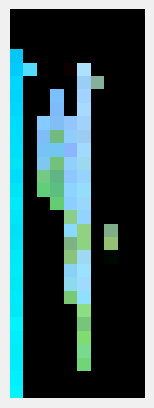

14/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.23it/s]


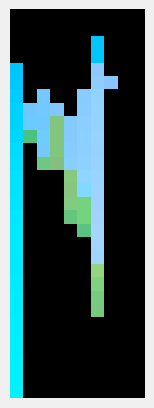

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


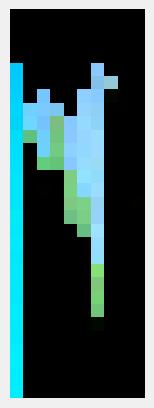

15/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.12it/s]


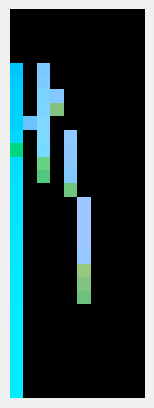

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


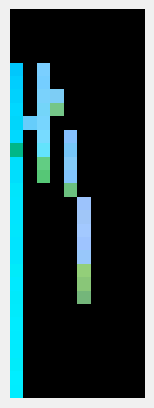

16/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.12it/s]


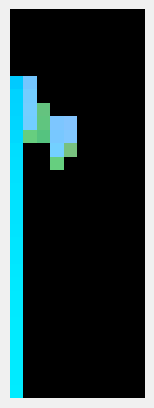

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


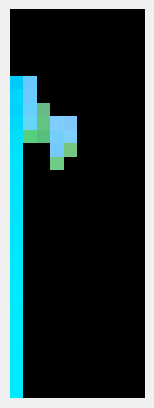

17/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.25it/s]


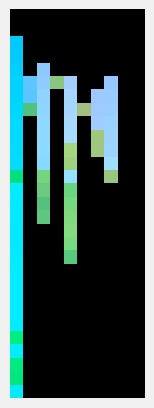

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


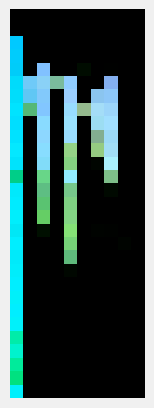

18/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.13it/s]


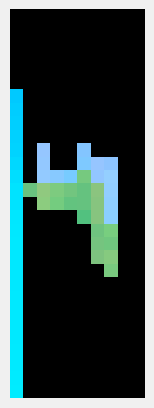

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


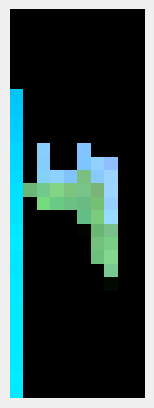

19/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.12it/s]


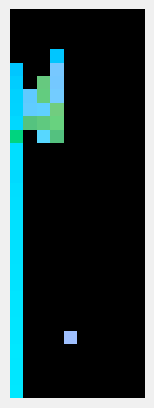

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


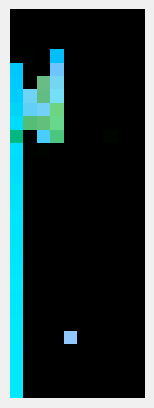

20/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.12it/s]


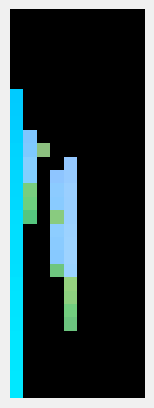

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


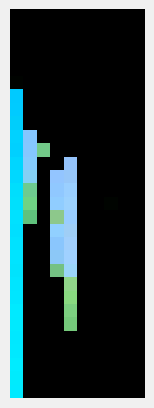

21/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.14it/s]


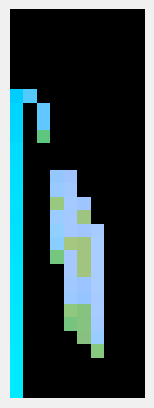

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


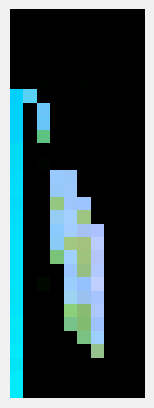

22/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.30it/s]


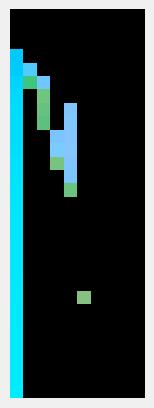

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


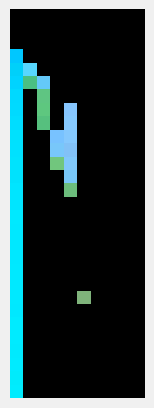

23/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.22it/s]


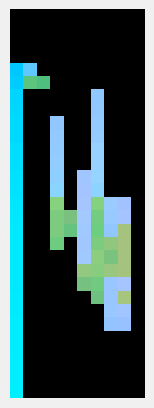

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


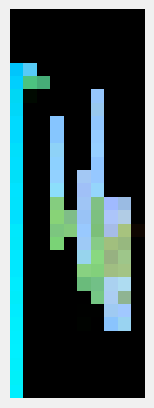

24/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.36it/s]


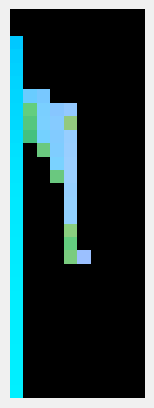

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


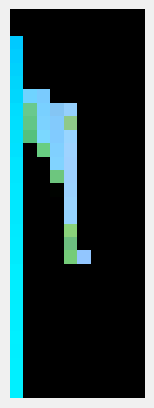

25/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.40it/s]


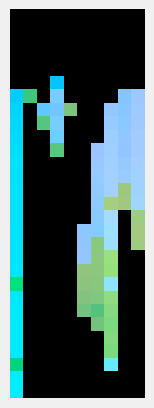

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


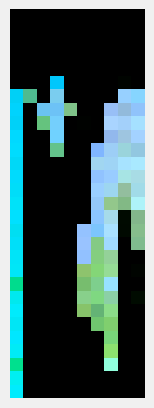

26/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.35it/s]


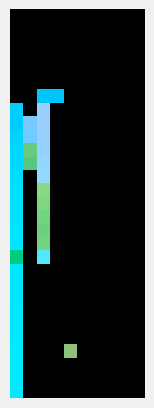

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


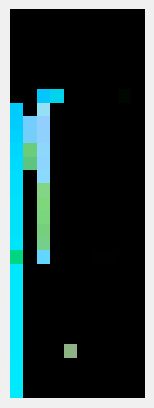

27/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.35it/s]


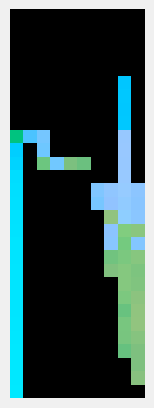

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


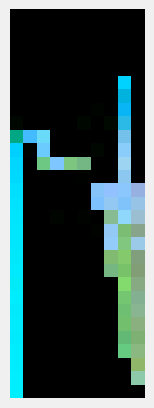

28/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.31it/s]


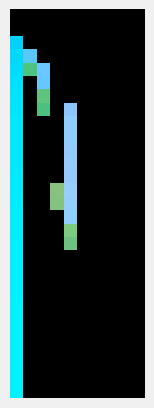

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


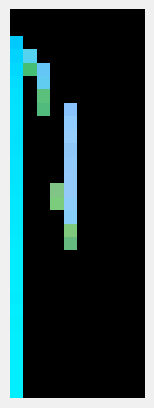

29/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.42it/s]


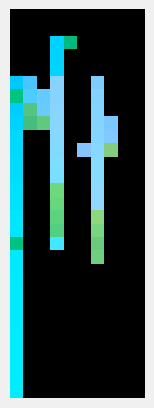

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


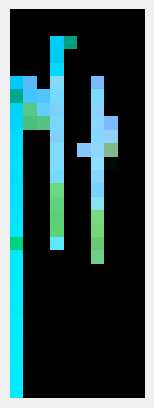

30/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.41it/s]


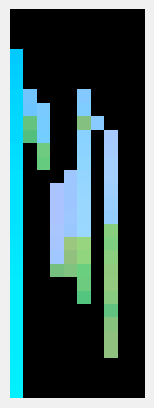

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


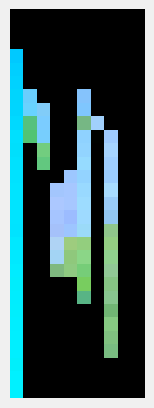

31/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.39it/s]


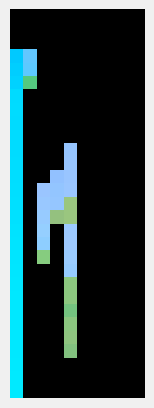

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


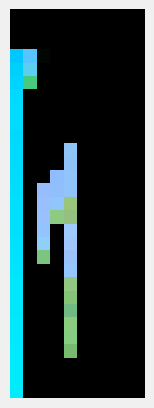

32/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.27it/s]


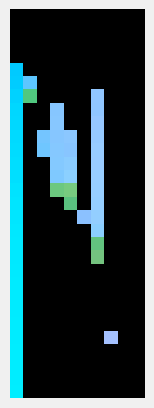

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


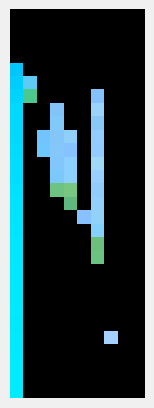

33/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.38it/s]


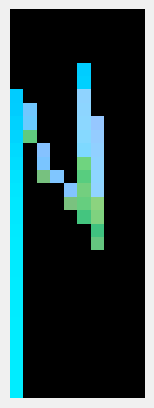

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


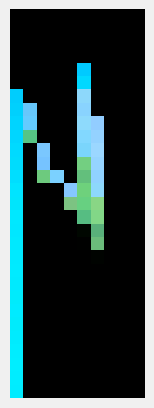

34/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.39it/s]


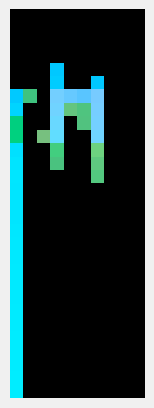

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


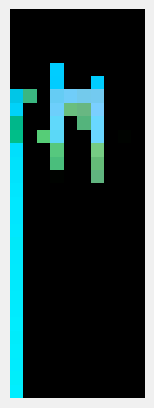

35/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.36it/s]


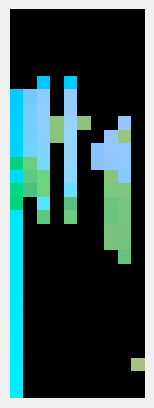

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


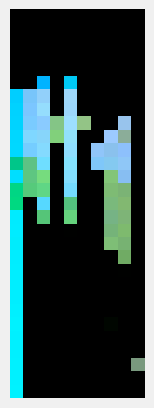

36/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.42it/s]


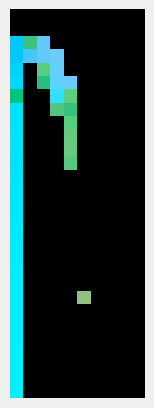

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


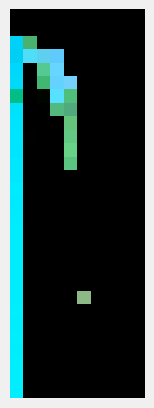

37/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.11it/s]


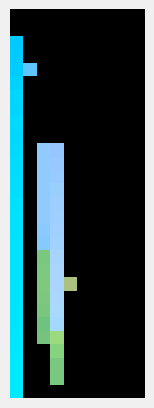

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


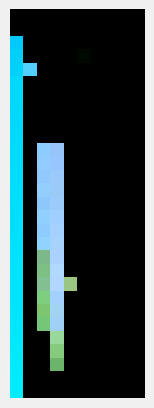

38/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.26it/s]


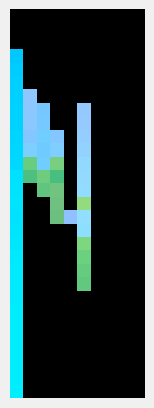

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


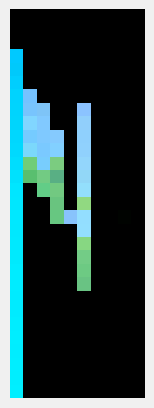

39/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.04it/s]


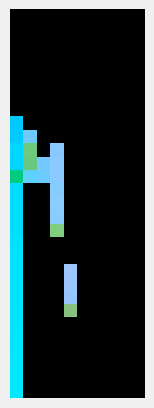

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


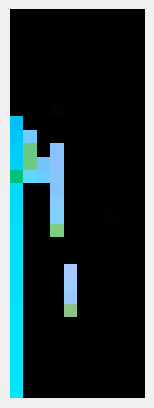

40/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.34it/s]


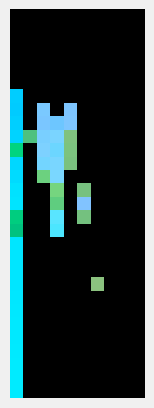

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


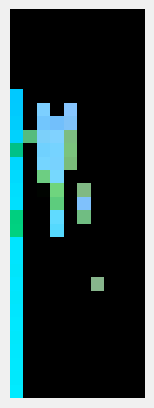

41/50


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.34it/s]


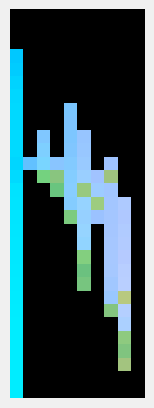

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


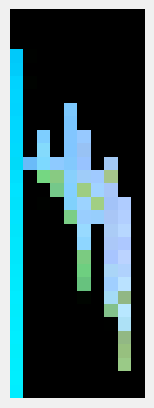

42/50


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.59it/s]


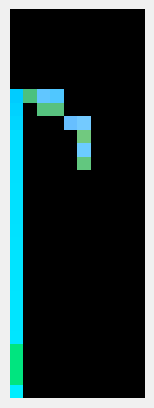

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


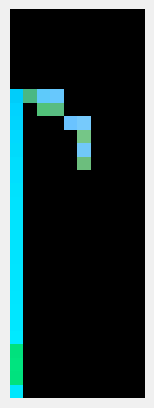

43/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.11it/s]


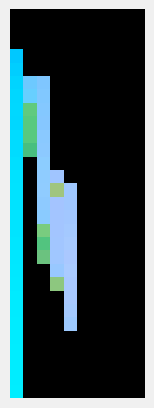

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


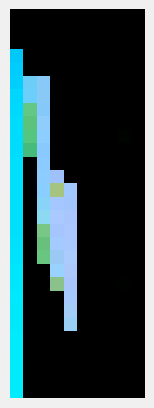

44/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.32it/s]


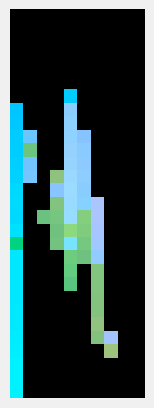

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


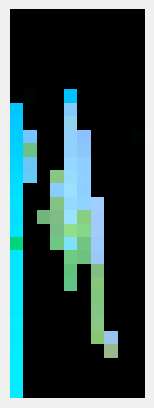

45/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.20it/s]


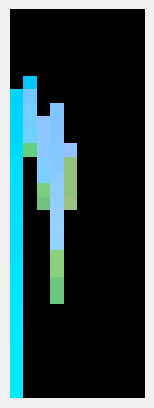

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


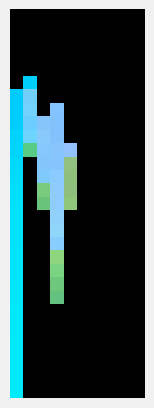

46/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.17it/s]


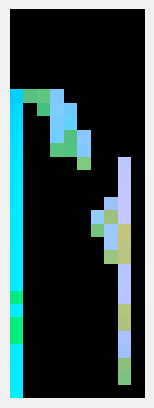

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


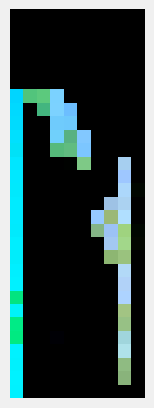

47/50


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.77it/s]


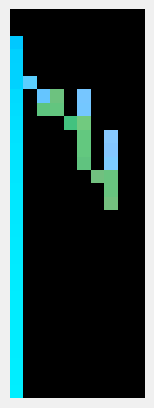

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


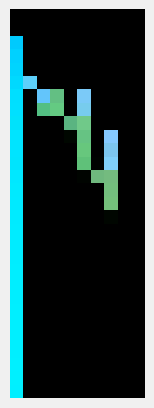

48/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.10it/s]


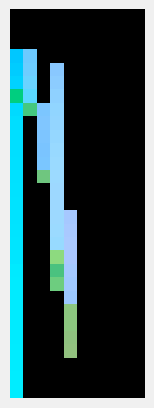

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


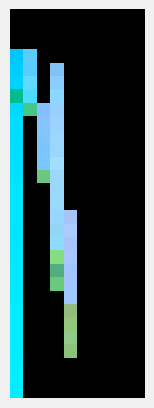

49/50


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.35it/s]


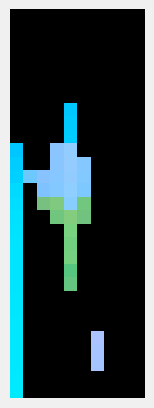

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


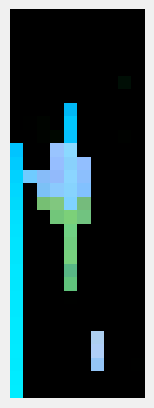

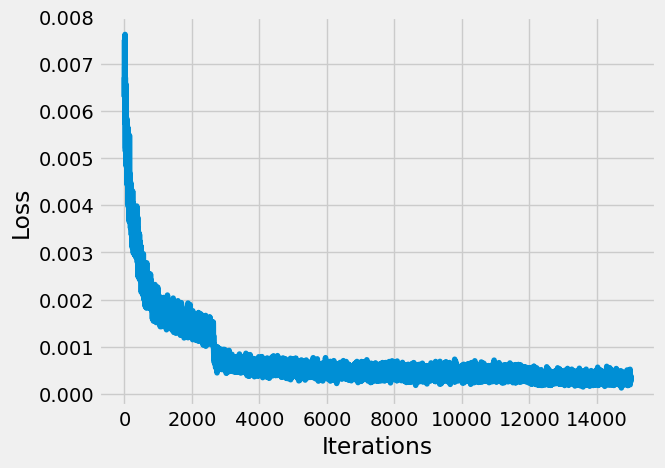

In [9]:
epochs = 50
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

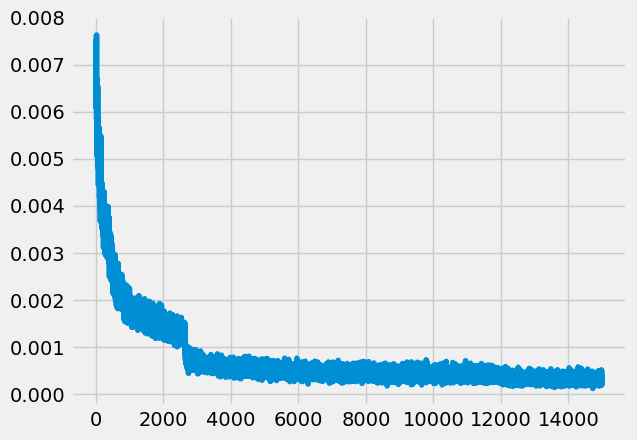

In [10]:
plt.plot(losses_small[:])

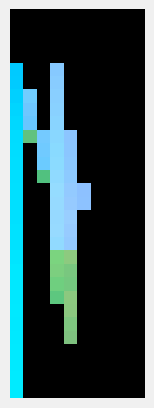

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


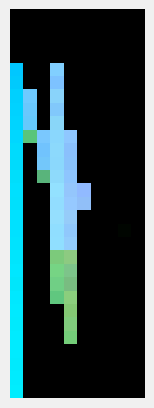

In [11]:
for i, item in enumerate(image):
    
    i = random.randint(0, 76)
    
    img1_small = image_small[i]
    img_small = img1_small.permute(1, 2, 0).detach().numpy()
    plt.imshow(img_small)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img2_small = reconstructed_small[i]
    img_small = img2_small.permute(1, 2, 0).detach().numpy()
    plt.imshow(img_small)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    break

real image:


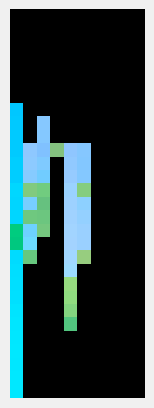

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed image:


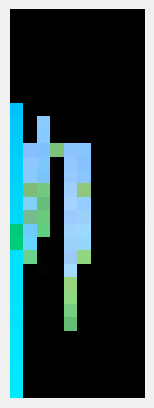


Dist:


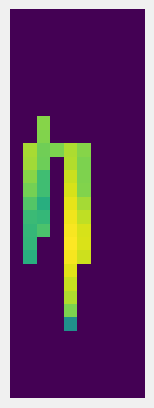

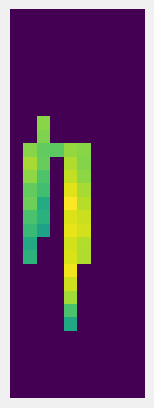


Mass:


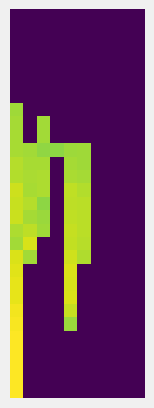

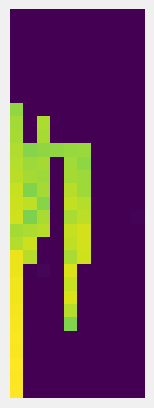


Subhalo


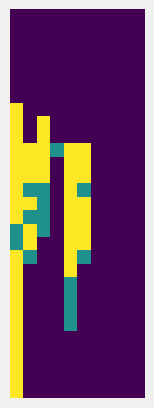

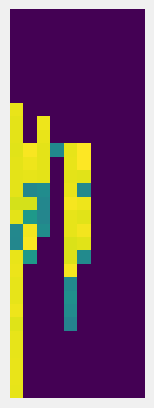

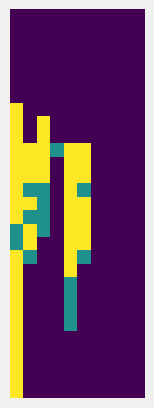

True


In [12]:
for i, item in enumerate(image):
    
    i = random.randint(0, 75)
    
    print("real image:")
    img1_small = image_small[i]
    img_small = img1_small.permute(1, 2, 0).detach().numpy()
    plt.imshow(img_small)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("reconstructed image:")
    img2_small = reconstructed_small[i]
    img_small = img2_small.permute(1, 2, 0).detach().numpy()
    plt.imshow(img_small)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    for j in range(3):
        if j == 0:
            print("\nDist:")
        elif j == 1:
            print("\nMass:")
        else:
            print("\nSubhalo")
        img1 = image[i][j]
        #img = img1.permute(1, 2, 0).detach().numpy()
        plt.imshow(img1)
        plt.axis('off')  # Optional: Turn off axis ticks and labels
        plt.show()

        img2 = torch.round(reconstructed_small[i][j], decimals = 3).detach().numpy()
        #img = img2.permute(1, 2, 0).detach().numpy()
        plt.imshow(img2)
        plt.axis('off')  # Optional: Turn off axis ticks and labels
        plt.show()
    
        if j == 2:
            img3 = torch.round(torch.tensor(img2), decimals = 2)
            img3 = map_values(img3)
            plt.imshow(img3)
            plt.axis('off')  # Optional: Turn off axis ticks and labels
            plt.show()
            
            print(torch.equal(img1, img3))
    
    break
    

0/25


100%|█████████████████████████████████████████| 300/300 [06:39<00:00,  1.33s/it]


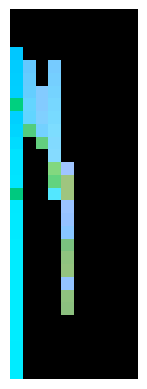

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


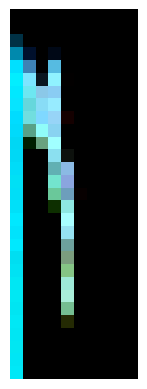


Dist:


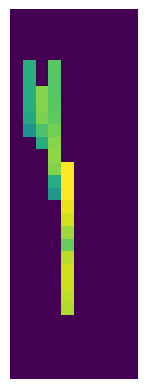

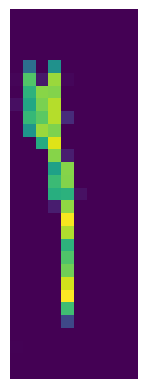


Mass:


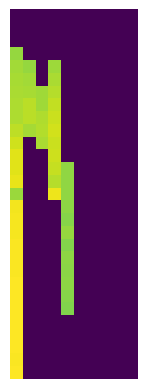

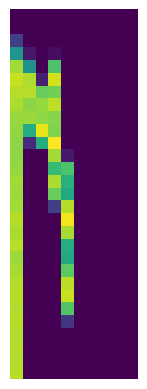


Subhalo


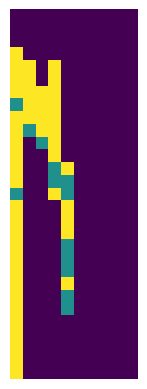

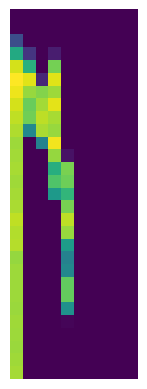

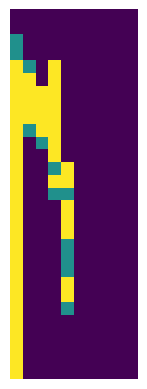

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 96.90% equal
1/25


100%|█████████████████████████████████████████| 300/300 [07:24<00:00,  1.48s/it]


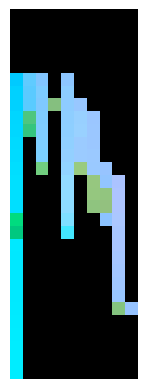

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


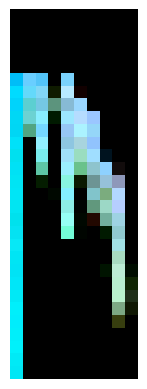


Dist:


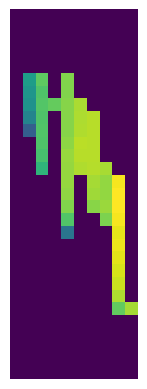

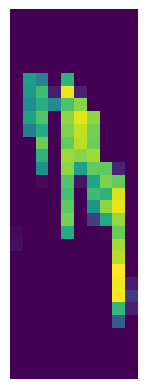


Mass:


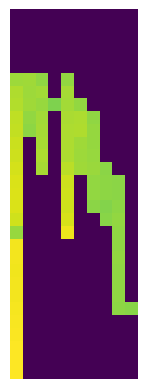

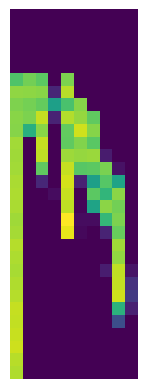


Subhalo


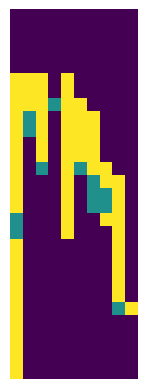

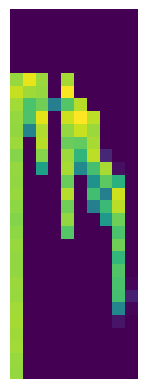

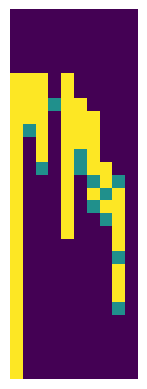

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 96.55% equal
2/25


100%|█████████████████████████████████████████| 300/300 [07:13<00:00,  1.44s/it]


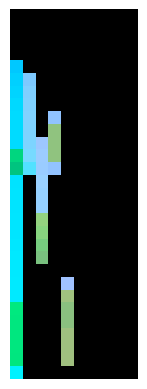

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


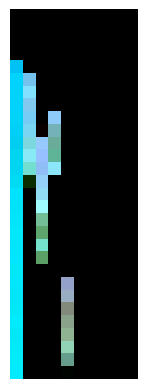


Dist:


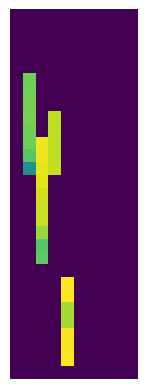

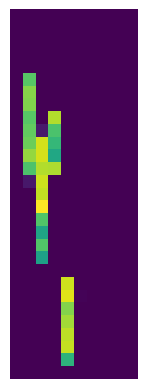


Mass:


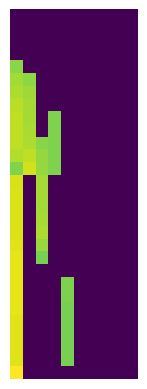

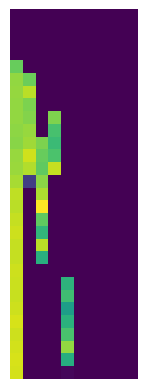


Subhalo


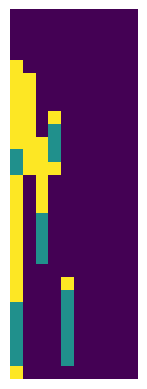

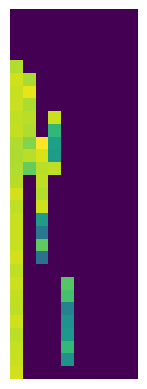

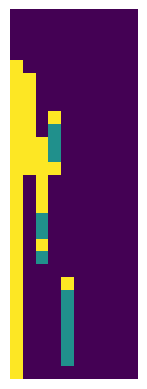

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 97.24% equal
3/25


100%|█████████████████████████████████████████| 300/300 [26:57<00:00,  5.39s/it]


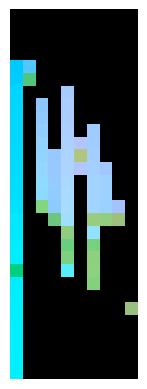

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


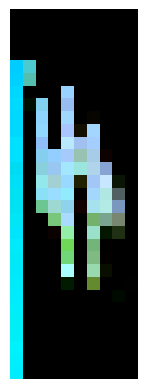


Dist:


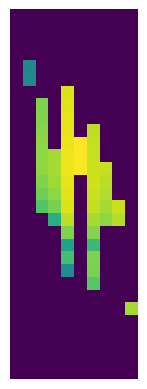

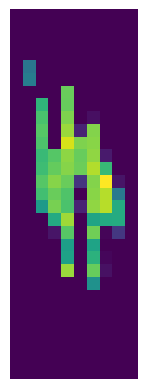


Mass:


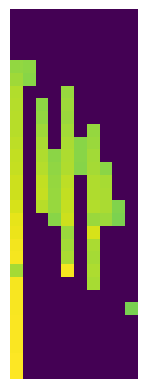

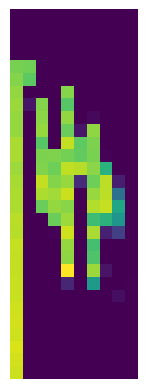


Subhalo


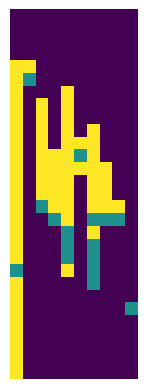

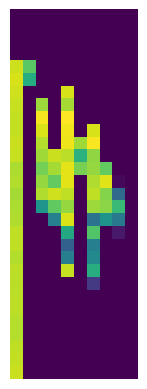

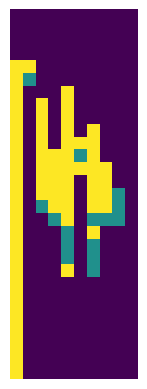

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 98.28% equal
4/25


100%|█████████████████████████████████████████| 300/300 [29:27<00:00,  5.89s/it]


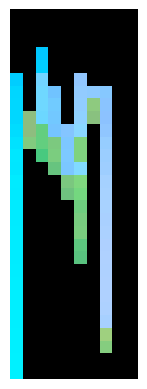

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


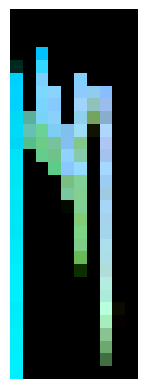


Dist:


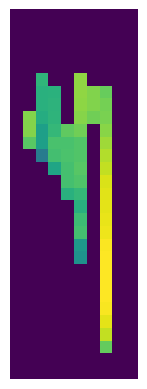

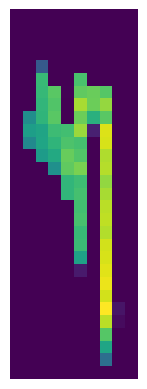


Mass:


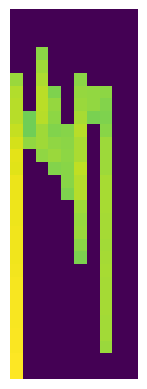

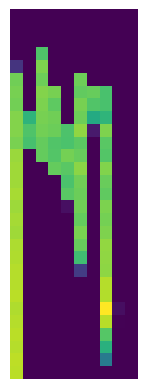


Subhalo


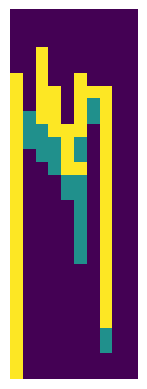

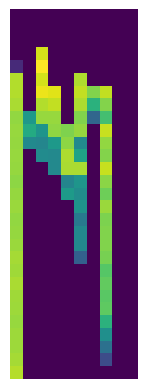

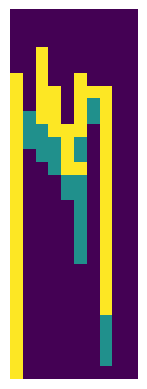

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.31% equal
5/25


100%|█████████████████████████████████████████| 300/300 [06:33<00:00,  1.31s/it]


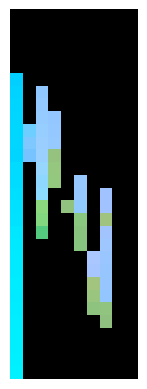

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


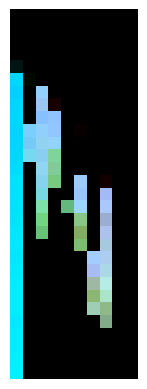


Dist:


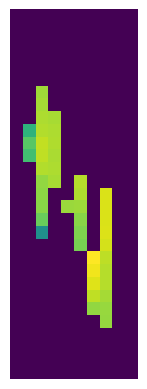

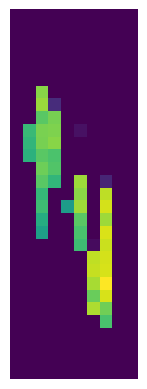


Mass:


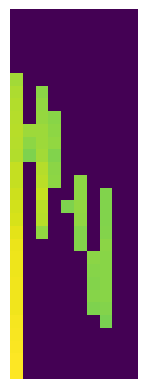

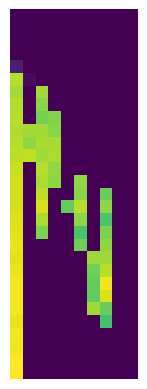


Subhalo


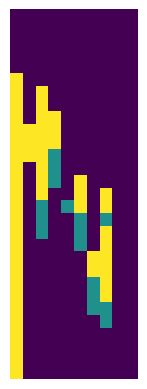

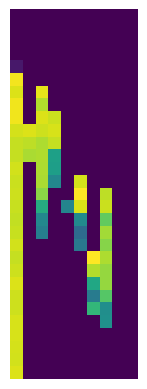

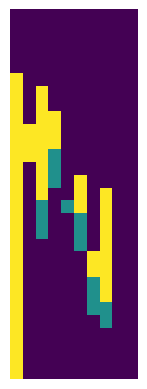

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.66% equal
6/25


100%|█████████████████████████████████████████| 300/300 [06:44<00:00,  1.35s/it]


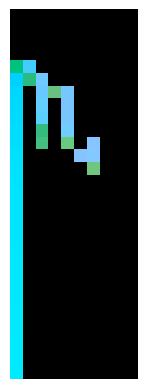

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


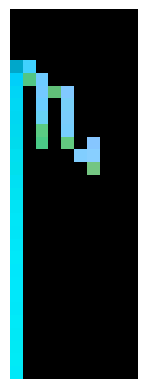


Dist:


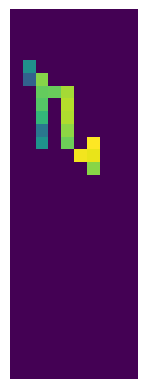

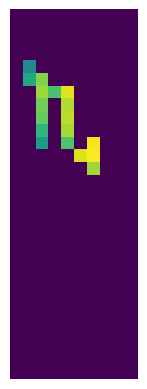


Mass:


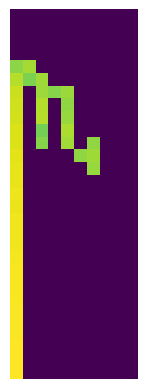

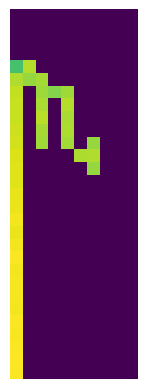


Subhalo


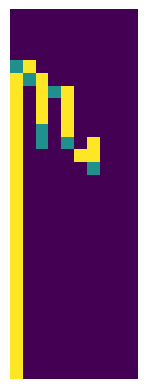

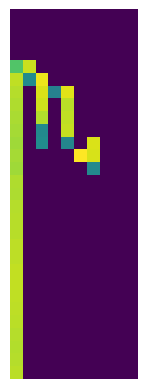

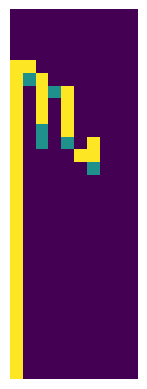

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.66% equal
7/25


100%|█████████████████████████████████████████| 300/300 [06:53<00:00,  1.38s/it]


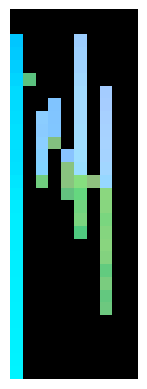

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


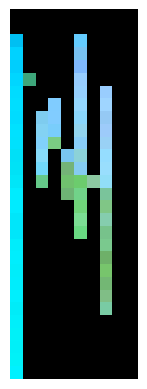


Dist:


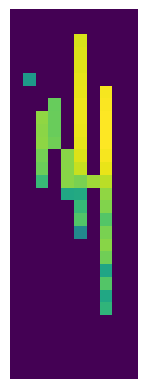

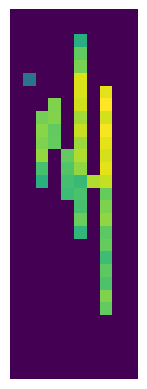


Mass:


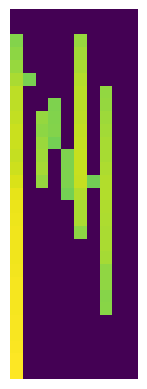

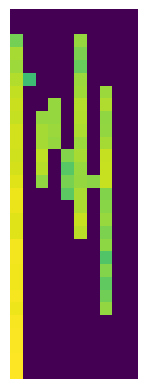


Subhalo


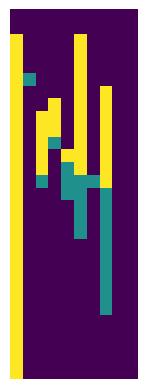

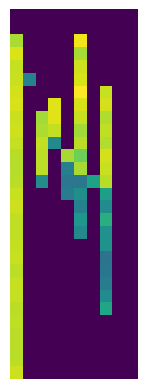

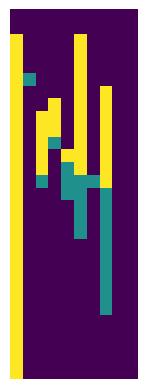

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
8/25


100%|█████████████████████████████████████████| 300/300 [07:04<00:00,  1.42s/it]


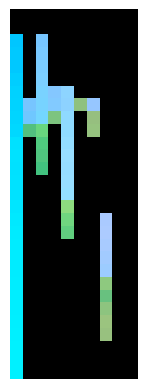

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


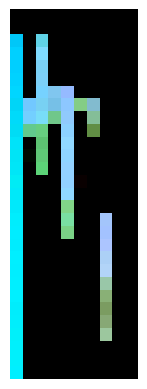


Dist:


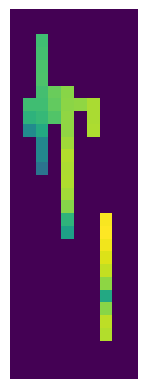

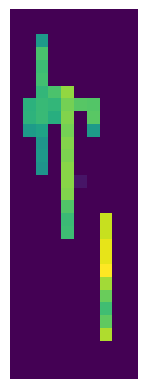


Mass:


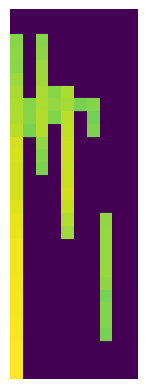

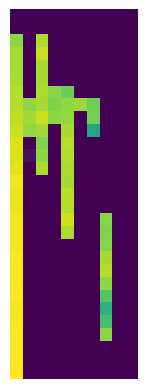


Subhalo


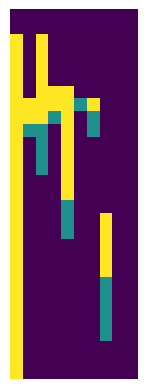

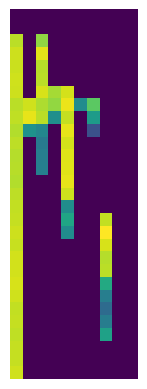

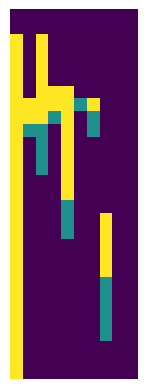

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
9/25


100%|█████████████████████████████████████████| 300/300 [21:38<00:00,  4.33s/it]


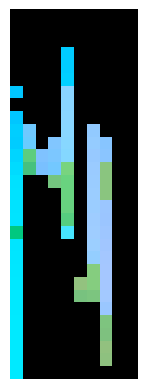

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


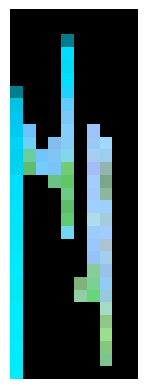


Dist:


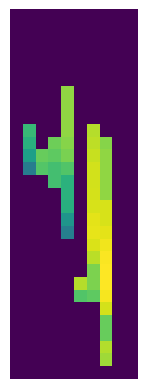

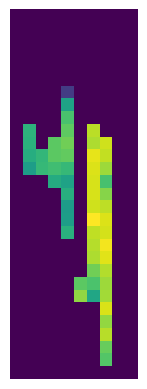


Mass:


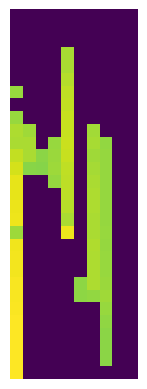

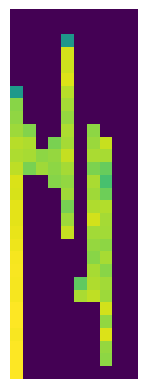


Subhalo


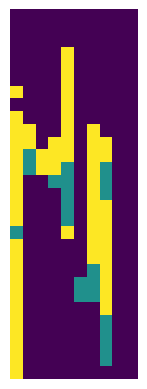

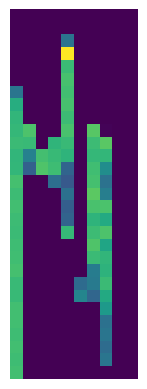

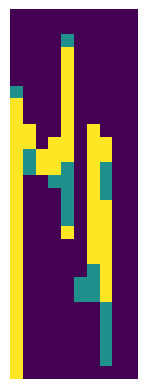

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 98.28% equal
10/25


100%|█████████████████████████████████████████| 300/300 [06:29<00:00,  1.30s/it]


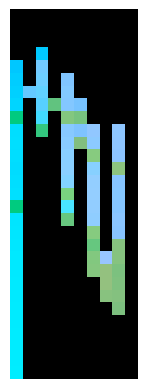

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


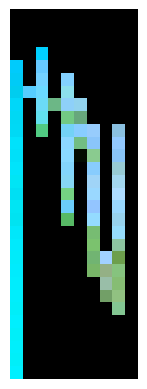


Dist:


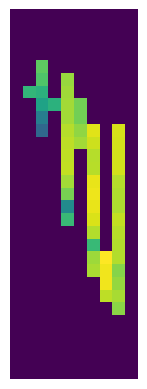

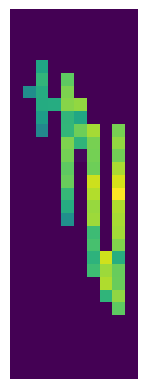


Mass:


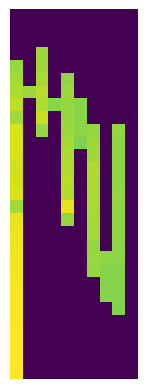

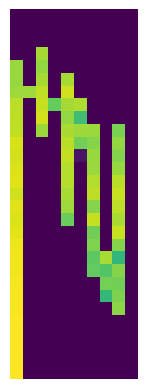


Subhalo


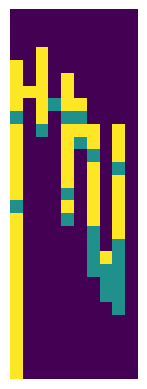

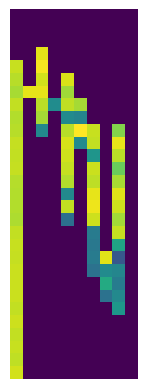

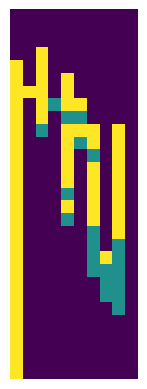

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 98.97% equal
11/25


100%|█████████████████████████████████████████| 300/300 [06:38<00:00,  1.33s/it]


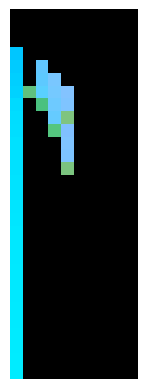

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


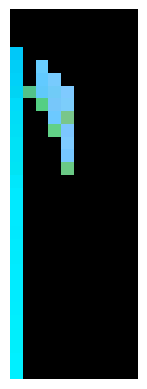


Dist:


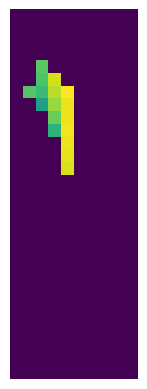

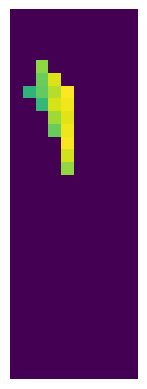


Mass:


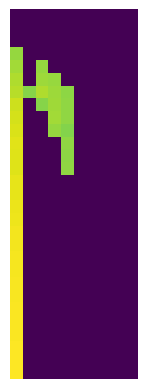

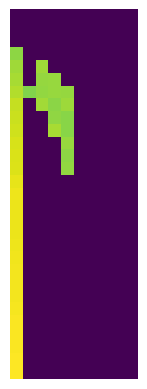


Subhalo


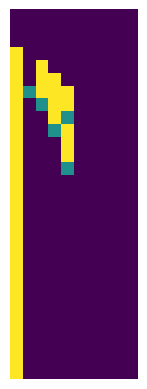

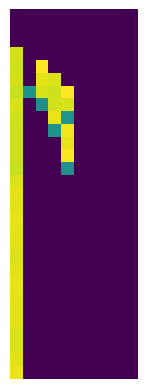

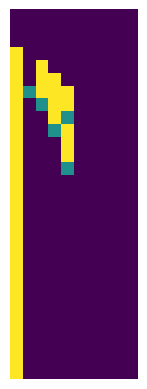

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
12/25


100%|█████████████████████████████████████████| 300/300 [06:42<00:00,  1.34s/it]


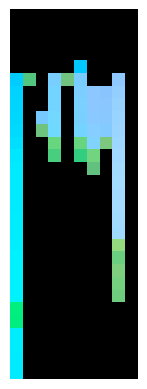

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


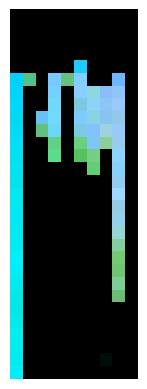


Dist:


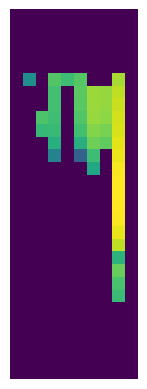

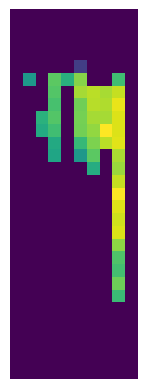


Mass:


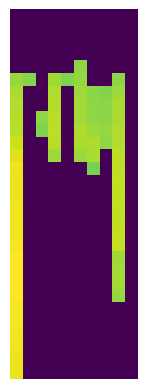

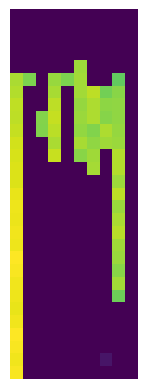


Subhalo


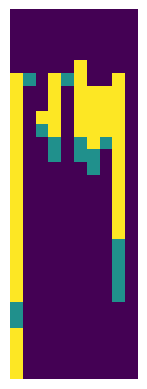

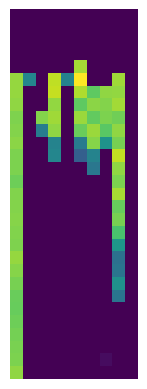

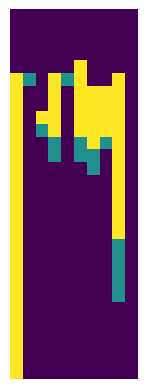

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.31% equal
13/25


100%|█████████████████████████████████████████| 300/300 [06:03<00:00,  1.21s/it]


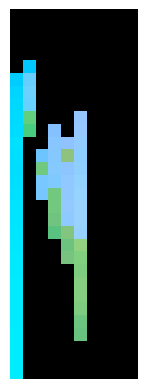

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


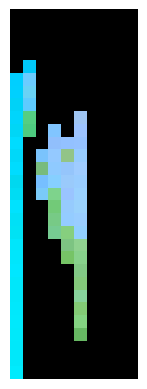


Dist:


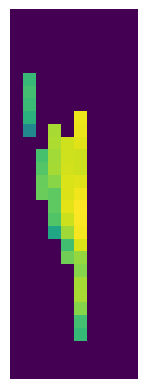

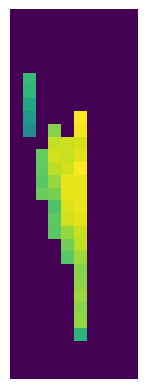


Mass:


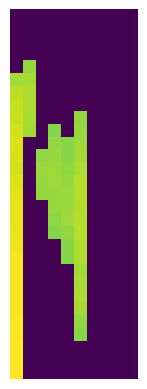

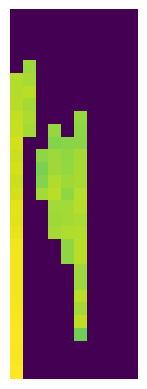


Subhalo


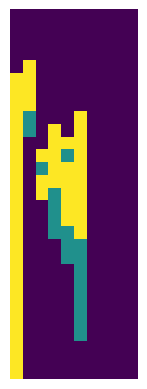

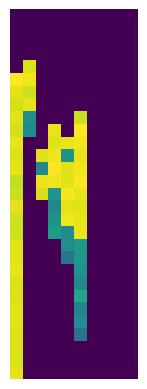

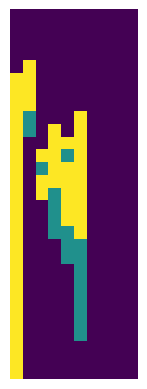

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
14/25


100%|█████████████████████████████████████████| 300/300 [05:34<00:00,  1.11s/it]


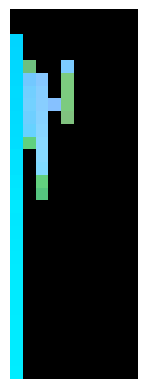

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


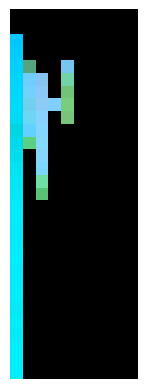


Dist:


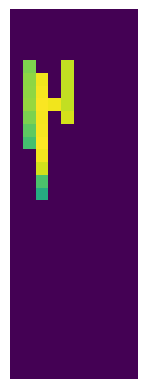

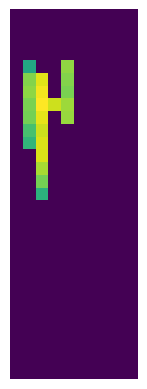


Mass:


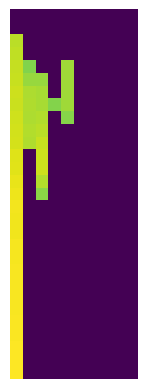

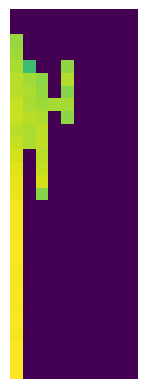


Subhalo


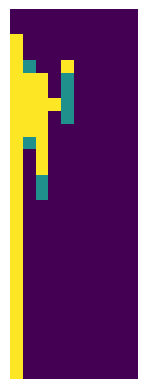

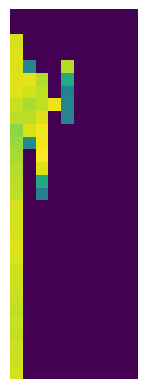

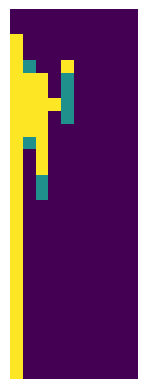

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
15/25


100%|█████████████████████████████████████████| 300/300 [05:32<00:00,  1.11s/it]


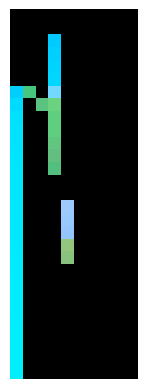

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


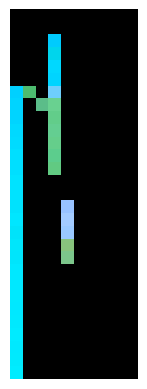


Dist:


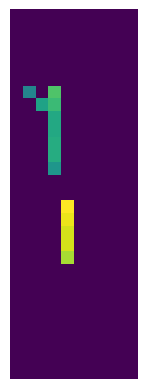

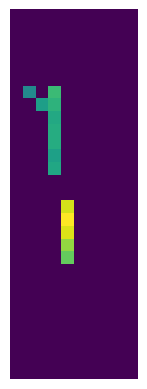


Mass:


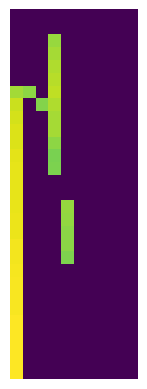

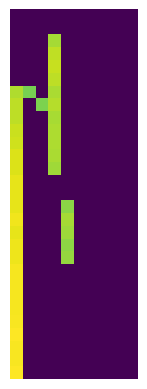


Subhalo


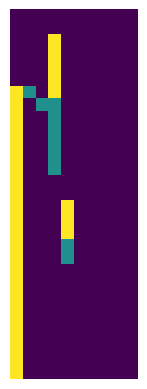

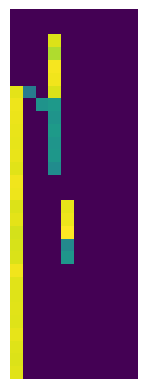

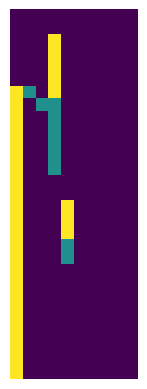

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
16/25


100%|█████████████████████████████████████████| 300/300 [05:34<00:00,  1.12s/it]


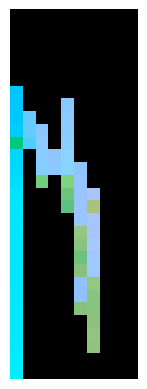

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


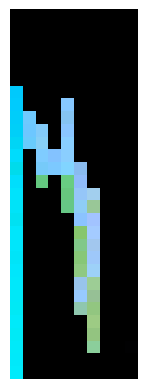


Dist:


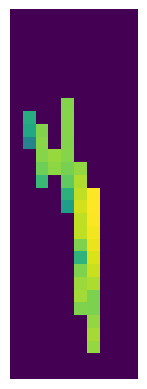

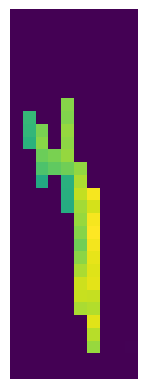


Mass:


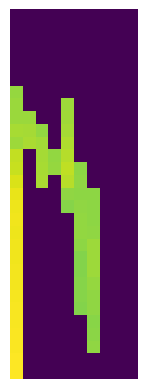

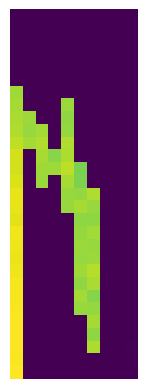


Subhalo


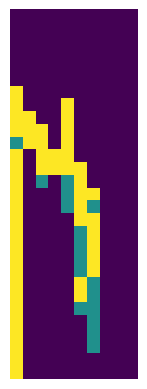

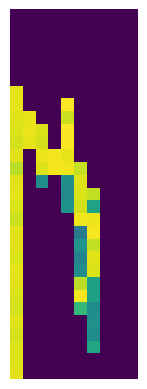

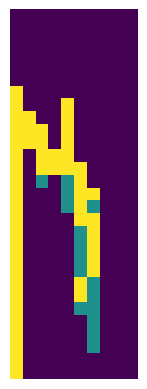

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.66% equal
17/25


100%|█████████████████████████████████████████| 300/300 [19:29<00:00,  3.90s/it]


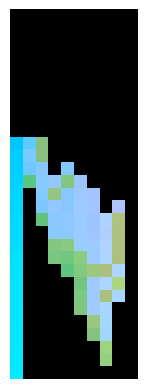

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


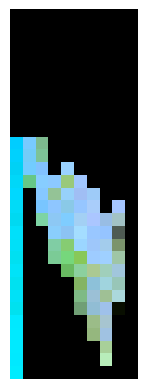


Dist:


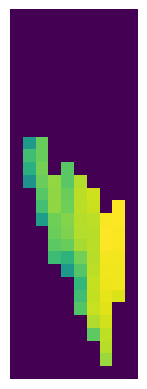

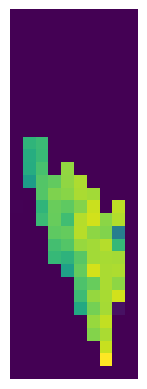


Mass:


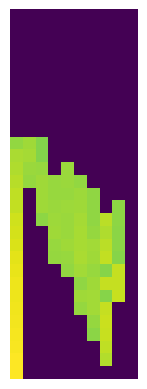

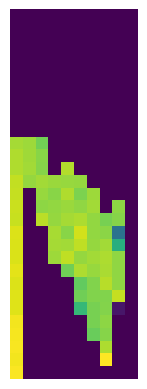


Subhalo


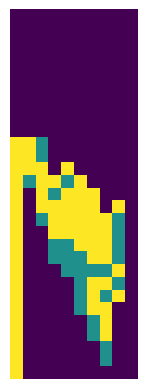

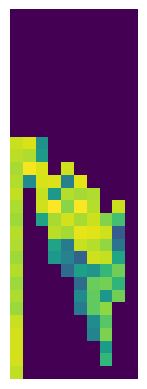

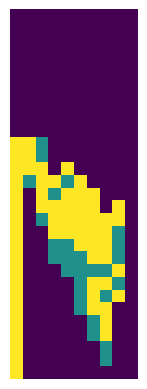

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.66% equal
18/25


100%|█████████████████████████████████████████| 300/300 [05:26<00:00,  1.09s/it]


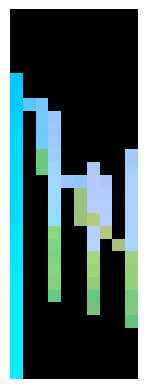

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


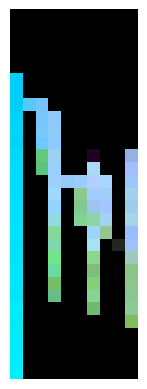


Dist:


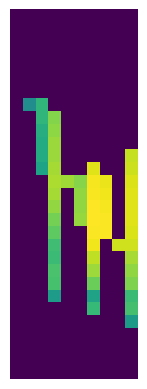

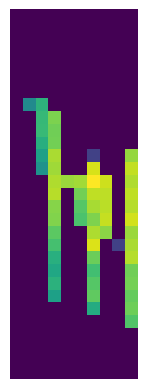


Mass:


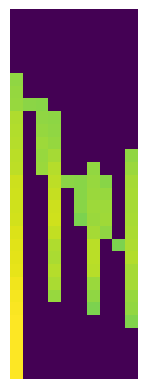

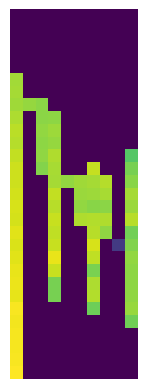


Subhalo


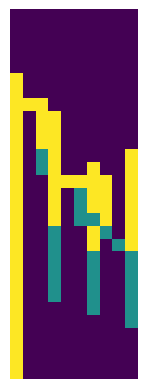

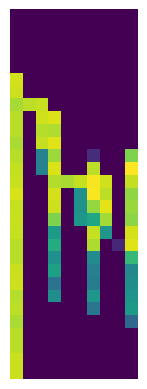

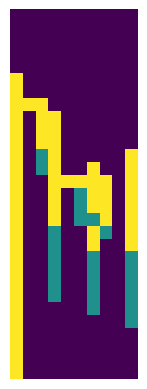

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.66% equal
19/25


100%|█████████████████████████████████████████| 300/300 [05:16<00:00,  1.05s/it]


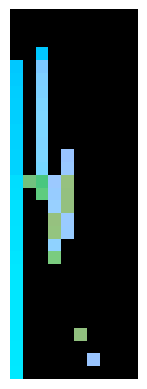

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


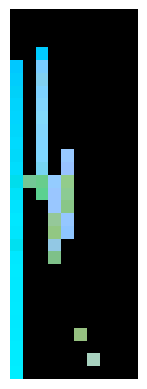


Dist:


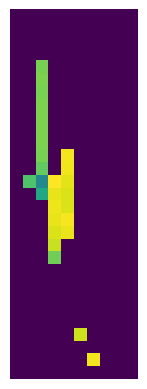

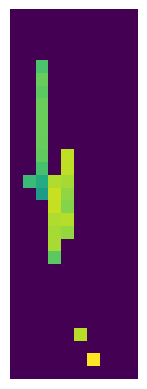


Mass:


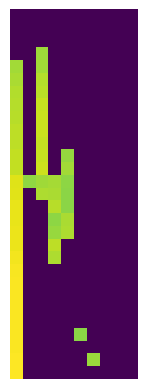

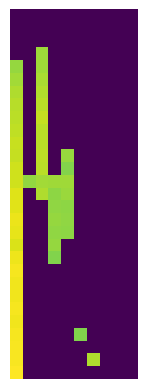


Subhalo


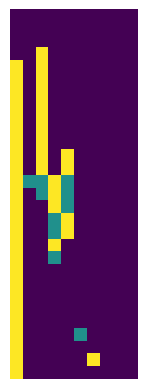

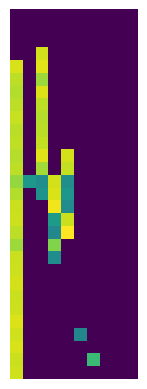

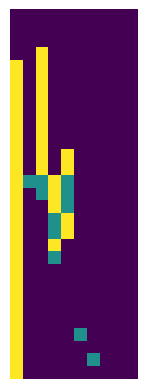

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.66% equal
20/25


100%|█████████████████████████████████████████| 300/300 [05:15<00:00,  1.05s/it]


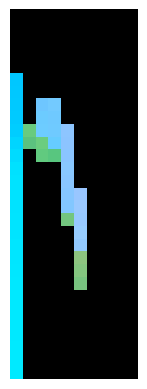

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


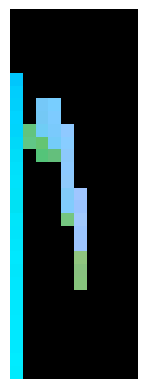


Dist:


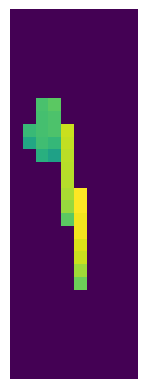

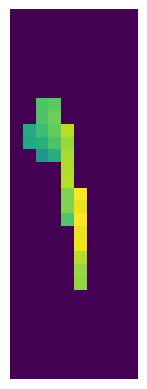


Mass:


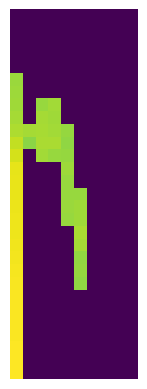

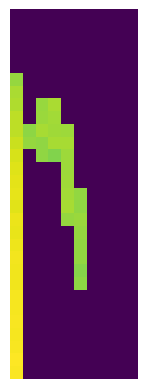


Subhalo


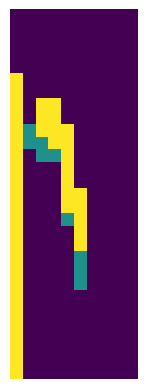

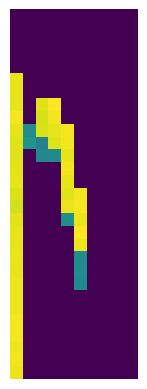

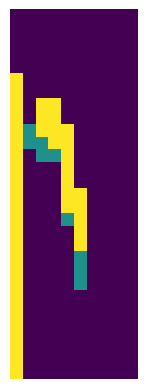

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
21/25


100%|█████████████████████████████████████████| 300/300 [05:15<00:00,  1.05s/it]


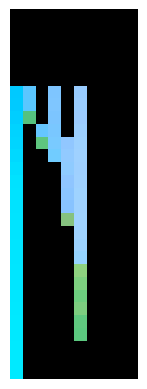

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


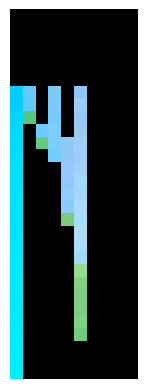


Dist:


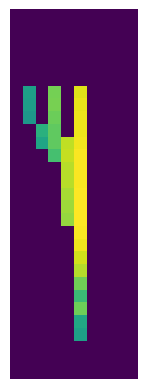

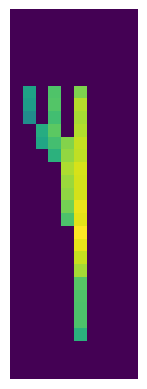


Mass:


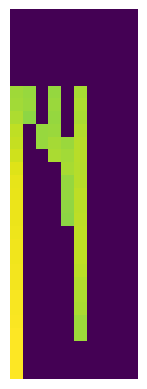

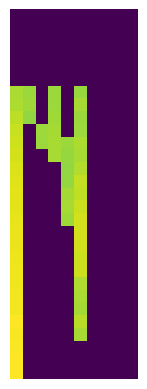


Subhalo


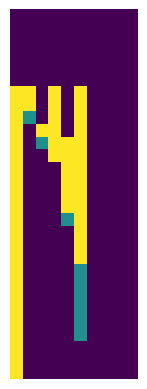

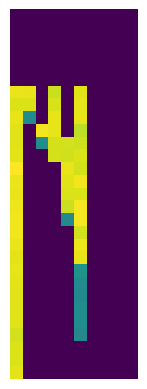

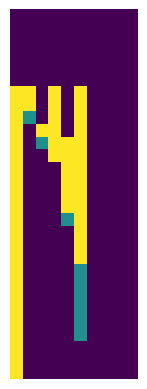

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
22/25


100%|███████████████████████████████████████| 300/300 [5:59:51<00:00, 71.97s/it]


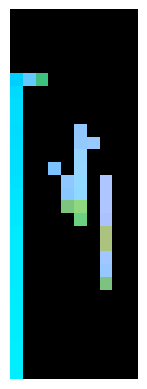

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


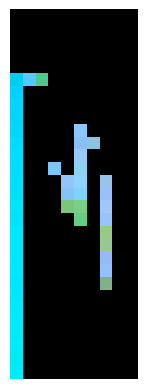


Dist:


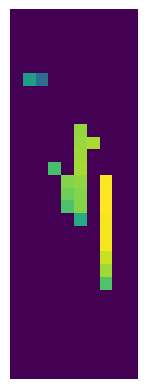

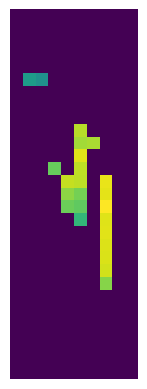


Mass:


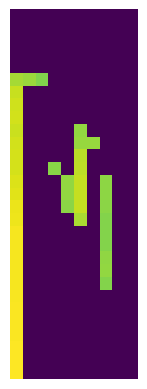

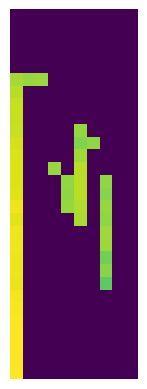


Subhalo


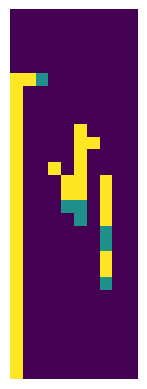

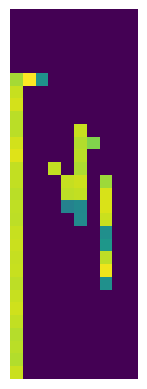

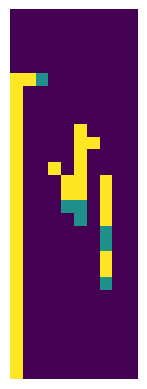

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
23/25


100%|███████████████████████████████████████| 300/300 [2:24:16<00:00, 28.85s/it]


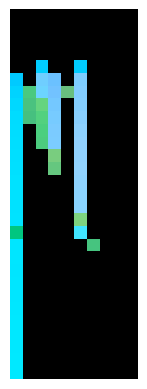

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


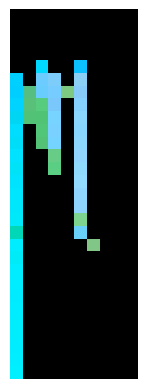


Dist:


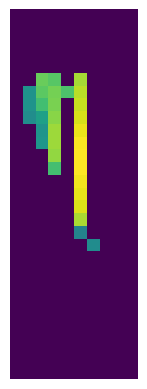

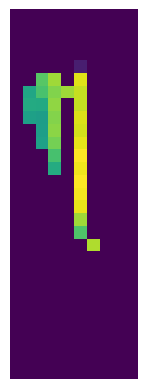


Mass:


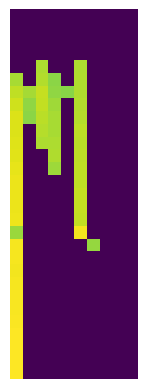

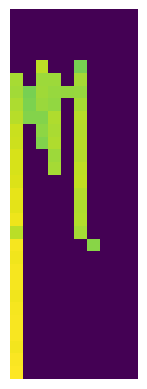


Subhalo


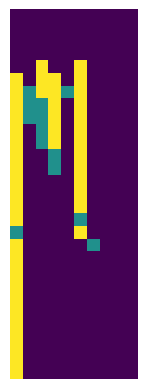

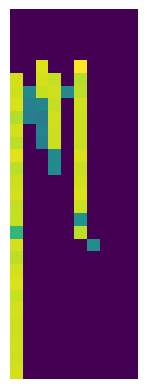

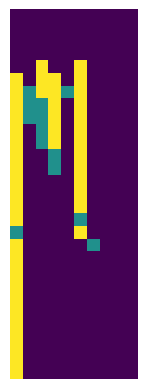

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal
24/25


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.07s/it]


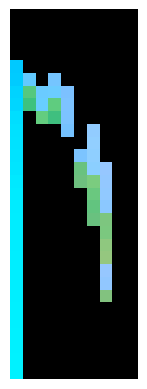

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


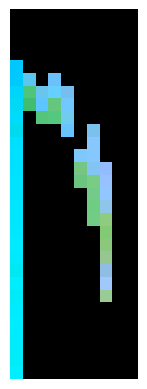


Dist:


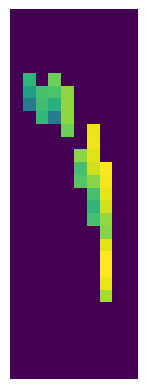

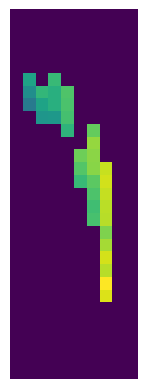


Mass:


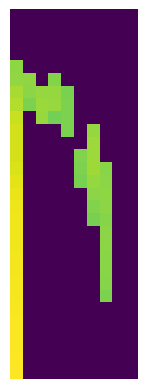

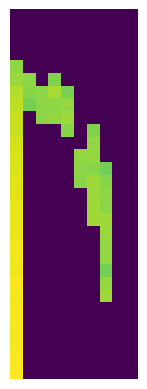


Subhalo


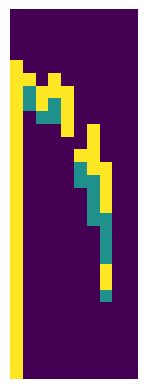

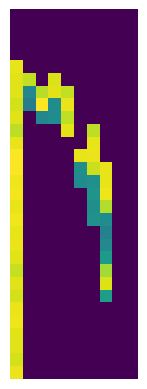

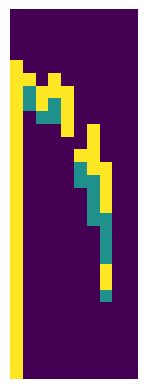

is orgiginal and mapped reconstructed image equal: True
image and mapped reconstructed is 100.00% equal


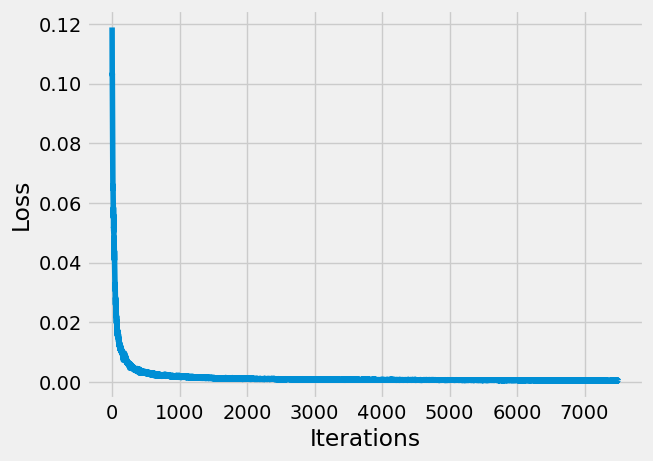

In [6]:
nsnap = dataset_one_one.shape[2]
nbr = dataset_one_one.shape[3]
nvar = dataset_one_one.shape[1]
printer = False

batch_size = 128
latent_size = 128

loader = DataLoader(dataset_one_one, shuffle=True, batch_size = batch_size)
encoder = Encoder_CGAN_big(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder = Generator_CGAN_big(nvar, nsnap, nbr, latent_size, printer).to(device)

model = AE(encoder, decoder)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)

def reconstruction_loss_CGAN(real_image, fake_image, mse = True):
    num_chan = real_image.shape[1]
    reconstruction_loss = 0.0
    for chan in range(num_chan):
        real_value = real_image[:, chan, :, :]
        fake_value = fake_image[:, chan, :, :]
        if mse:
            reconstruction_loss += ((real_value - fake_value)**2).sum()
        else:
            criterion = nn.CrossEntropyLoss()
            reconstruction_loss += criterion(real_value, fake_value)

    return reconstruction_loss

epochs = 25
outputs = []
losses = []
images = []
reconstructed_images = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed = model(image)

        if epoch == epochs - 1:
            images.append(image)
            reconstructed_images.append(reconstructed.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.detach().numpy())
        outputs.append((epochs, image, reconstructed))
        
    img = image[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    for j in range(3):
        if j == 0:
            print("\nDist:")
        elif j == 1:
            print("\nMass:")
        else:
            print("\nSubhalo")
        img1 = image[0][j]
        #img = img1.permute(1, 2, 0).detach().numpy()
        plt.imshow(img1)
        plt.axis('off')  # Optional: Turn off axis ticks and labels
        plt.show()

        img2 = reconstructed[0][j].detach().numpy()
        #img = img2.permute(1, 2, 0).detach().numpy()
        plt.imshow(img2)
        plt.axis('off')  # Optional: Turn off axis ticks and labels
        plt.show()

        if j == 2:
            img3 = torch.tensor(img2)
            img3 = map_values(img3)
            plt.imshow(img3)
            plt.axis('off')  # Optional: Turn off axis ticks and labels
            plt.show()

            print("is orgiginal and mapped reconstructed image equal:", torch.equal(img1, img3))
            print(f"image and mapped reconstructed is {similarity_percentage(img1, img3):.2f}% equal")

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses)

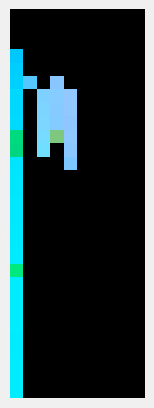

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


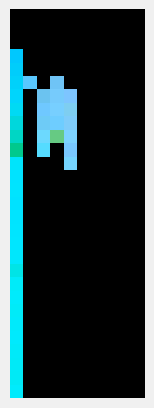

In [7]:
for i, item in enumerate(image):
    
    i = random.randint(0, 75)
    
    img1 = image[i]
    img = img1.permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img2 = reconstructed[i]
    img = img2.permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    break


Dist:


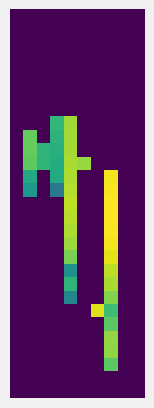

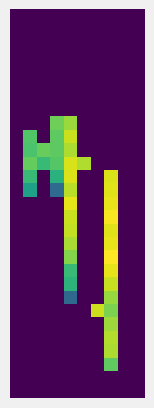


Mass:


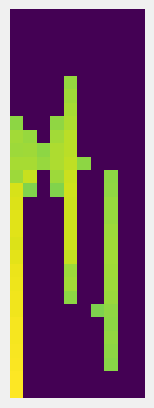

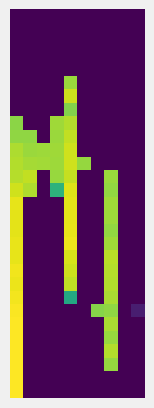


Subhalo


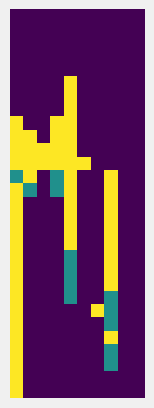

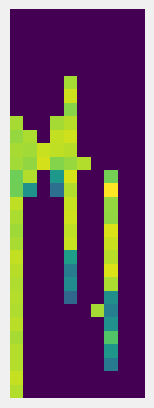

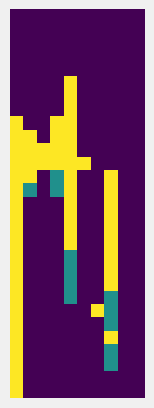

is orgiginal and mapped reconstructed image equal: False
image and mapped reconstructed is 99.66% equal


In [8]:
im = random.randint(0, len(images))
image = images[im]
reconstructed = reconstructed_images[im]

i = random.randint(0,image.shape[0])

for j in range(3):
    if j == 0:
        print("\nDist:")
    elif j == 1:
        print("\nMass:")
    else:
        print("\nSubhalo")
    img1 = image[i][j]
    #img = img1.permute(1, 2, 0).detach().numpy()
    plt.imshow(img1)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

    img2 = reconstructed[i][j].detach().numpy()
    #img = img2.permute(1, 2, 0).detach().numpy()
    plt.imshow(img2)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

    if j == 2:
        img3 = torch.tensor(img2)
        img3 = map_values(img3)
        plt.imshow(img3)
        plt.axis('off')  # Optional: Turn off axis ticks and labels
        plt.show()

        print("is orgiginal and mapped reconstructed image equal:", torch.equal(img1, img3))
        print(f"image and mapped reconstructed is {similarity_percentage(img1, img3):.2f}% equal")



# test what upper and lower bound is best for subhalo

In [9]:
def map_values(tensor, lower_threshold = 0.01, upper_threshold = 0.75):
    """
    Map values of a tensor between 0 and 1 to 0.0, 0.5, or 1.0 based on thresholds.

    Args:
    - tensor: Input tensor with values between 0 and 1.
    - lower_threshold: Lower threshold for mapping (inclusive).
    - upper_threshold: Upper threshold for mapping (exclusive).

    Returns:
    - mapped_tensor: Tensor with values mapped to 0.0, 0.5, or 1.0.
    """

    # Create a tensor of zeros with the same shape as the input tensor
    mapped_tensor = torch.zeros_like(tensor)

    # Map values based on thresholds
    mapped_tensor[[tensor < lower_threshold]] = 0.0
    mapped_tensor[(tensor > lower_threshold) & (tensor < upper_threshold)] = 0.5
    mapped_tensor[tensor >= upper_threshold] = 1.0

    return mapped_tensor

In [10]:
images_stack = torch.cat(images, dim = 0)
recon_images_stack = torch.cat(reconstructed_images, dim = 0)

In [11]:
images_stack.shape

torch.Size([38348, 3, 29, 10])

In [13]:
count_equality(images, reconstructed_images)

Number of 100% equal subh images = 25570 / 38348 = 66.68% of recon subh are equal original subh
Average similarity = 99.81%


(25570, 99.8117)

In [16]:
#lb = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
lb = [0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25]
u = 0.8
best_eq = 0
best_sim = 0
value_eq = 0
value_sim = 0

for l in lb:
    print("\n")
    print(f"lower = {l}, upper = {u}")
    equal, sim = count_equality(images, reconstructed_images, l, u)
    if equal > best_eq:
        best_eq = equal
        value_eq = l
        
    if sim > best_sim:
        best_sim = sim
        value_sim = l
        
    print("\n")
    
print(f"best sim is {best_sim:.2f}% with lower bound {value_sim}")
print(f"best equal is {best_eq} with lower bound {value_eq}")



lower = 0.14, upper = 0.8
Number of 100% equal subh images = 25198 / 38348 = 65.71% of recon subh are equal original subh
Average similarity = 99.80%




lower = 0.15, upper = 0.8
Number of 100% equal subh images = 25269 / 38348 = 65.89% of recon subh are equal original subh
Average similarity = 99.80%




lower = 0.16, upper = 0.8
Number of 100% equal subh images = 25342 / 38348 = 66.08% of recon subh are equal original subh
Average similarity = 99.80%




lower = 0.17, upper = 0.8
Number of 100% equal subh images = 25403 / 38348 = 66.24% of recon subh are equal original subh
Average similarity = 99.80%




lower = 0.18, upper = 0.8
Number of 100% equal subh images = 25459 / 38348 = 66.39% of recon subh are equal original subh
Average similarity = 99.80%




lower = 0.19, upper = 0.8
Number of 100% equal subh images = 25496 / 38348 = 66.49% of recon subh are equal original subh
Average similarity = 99.81%




lower = 0.2, upper = 0.8
Number of 100% equal subh images = 25546 / 38348 

In [17]:
#ub = [0.65, 0.7, 0.75, 0.775, 0.8, 0.85, 0.9, 0.95, 0.99]
#ub = [0.75, 0.76, 0.77, 0.775, 0.78, 0.79, 0.8, 0.85]
ub = [0.76, 0.765, 0.77, 0.775]
l = 0.19

best_eq = 0
best_sim = 0
value_eq = 0
value_sim = 0

for u in ub:
    print("\n")
    print(f"lower = {l}, upper = {u}")
    equal, sim = count_equality(images, reconstructed_images, l, u)
    if equal > best_eq:
        best_eq = equal
        value_eq = u
        
    if sim > best_sim:
        best_sim = sim
        value_sim = u
        
    print("\n")
    
print(f"best sim is {best_sim:.2f}% with lower bound {value_sim}")
print(f"best equal is {best_eq} with lower bound {value_eq}")



lower = 0.19, upper = 0.76
Number of 100% equal subh images = 25413 / 38348 = 66.27% of recon subh are equal original subh
Average similarity = 99.81%




lower = 0.19, upper = 0.765
Number of 100% equal subh images = 25494 / 38348 = 66.48% of recon subh are equal original subh
Average similarity = 99.81%




lower = 0.19, upper = 0.77
Number of 100% equal subh images = 25570 / 38348 = 66.68% of recon subh are equal original subh
Average similarity = 99.81%




lower = 0.19, upper = 0.775
Number of 100% equal subh images = 25617 / 38348 = 66.80% of recon subh are equal original subh
Average similarity = 99.81%


best sim is 99.81% with lower bound 0.775
best equal is 25617 with lower bound 0.775


In [19]:
count_equality(images, reconstructed_images, 0.19, 0.77)

Number of 100% equal subh images = 25570 / 38348 = 66.68% of recon subh are equal original subh
Average similarity = 99.81%


(25570, 99.8117)